Using column 'No, the driver went way beyond as far as being a creep!!! Definitely report him and they will block him from being your driver again… just keep an eye out if he does show up at your work worst case scenario you can file a restraining order against him. I would also suggest getting gel pepper spray for protection, and learn to stand your ground when you tell someone no. If anybody does that again, just tell them you’re married.. It works for me.' as the review column.
Sentiment Tally:
Sentiment
Positive    228
Negative    218
Neutral     175
Name: count, dtype: int64

Consensus: Overall Positive


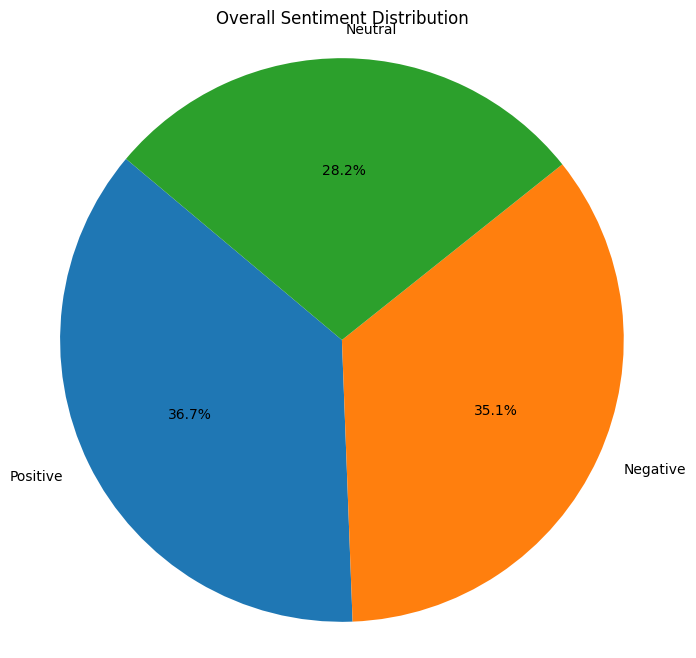

In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming the file is named RedditReviews.csv)
try:
    df = pd.read_csv("RedditReviews.csv")
except FileNotFoundError:
    print("Error: RedditReviews.csv not found. Please make sure the file is uploaded.")
    exit() # Exit if the file is not found

# Check if the 'review' column exists, if not, try to find a suitable column
if 'review' not in df.columns:
    print("Warning: 'review' column not found. Attempting to use the first text-based column.")
    text_column = None
    for col in df.columns:
        if df[col].dtype == 'object': # Check for object type, which often indicates text
            text_column = col
            break
    if text_column:
        df['Review'] = df[text_column].astype(str) # Rename the found column to 'Review'
        print(f"Using column '{text_column}' as the review column.")
    else:
        print("Error: No suitable text column found for sentiment analysis.")
        exit()

nltk.download('vader_lexicon', quiet=True) # Download VADER lexicon if not already present

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Classify each review
def get_sentiment(text):
    score = sid.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df['Review'].apply(get_sentiment)

# Count each category
tally = df["Sentiment"].value_counts()

# Determine consensus
if tally.max() == tally.get("Positive", 0):
    consensus = "Overall Positive"
elif tally.max() == tally.get("Negative", 0):
    consensus = "Overall Negative"
else:
    consensus = "Overall Neutral"

print("Sentiment Tally:")
print(tally)
print("\nConsensus:", consensus)

# --- Visualizations ---

# Pie chart of overall sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(tally, labels=tally.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')
plt.show()

# If a 'Score' column exists, visualize sentiment by score (adapt if needed)
if 'Score' in df.columns:
    sentiment_by_score = df.groupby('Score')['Sentiment'].value_counts().unstack().fillna(0)
    sentiment_by_score.plot(kind='bar', stacked=True, figsize=(10, 7))
    plt.title('Sentiment Distribution by Score')
    plt.xlabel('Score')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=0)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re # Import the re module

# Clean and preprocess the reviews
def preprocess_text(text):
    text = re.sub(r'http\S+', '', str(text).lower()) # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
    return text

df['cleaned_review'] = df['Review'].apply(preprocess_text)

# Use TF-IDF to convert text data into a matrix of token counts
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Fit LDA model
num_topics = 5 # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf)

# Function to print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_): # Access components_ instead of components__
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# Print the top words for the identified topics
n_top_words = 10 # Number of top words to print for each topic
print_top_words(lda, tfidf_vectorizer.get_feature_names_out(), n_top_words)

# Assign topics to each review (optional, but useful for further analysis)
topic_assignment = lda.transform(tfidf)
df['topic'] = topic_assignment.argmax(axis=1)

print("\nReviews with assigned topics:")
print(df[['Review', 'topic']].head())

Topic #1:
driver point youre problem end uber mean service charged agree
Topic #2:
exactly tip yeah language english thats way pay service driver
Topic #3:
drivers uber just ride dont driver drive deleted like want
Topic #4:
woman drivers like driver job dont definitely cancel sorry ride
Topic #5:
car seat driver dont im uber lol people ive kids


Reviews with assigned topics:
                                              Review  topic
0  Not an overreaction. Trust your intuition here...      4
1  I dont think it has to do with accelerating th...      3
2  I just mean think of how many victims don&#39;...      4
3  Those Waymo cars won&#39;t have this problem. ...      0
4  No they can’t see your address once you’re dro...      0


In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


# === Load your dataset ===
# Assume CSV has a column named 'review'
df = pd.read_csv("Reviews.csv")

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Classify each review
def get_sentiment(text):
    score = sid.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df['Review'].apply(get_sentiment)

# === Count each category ===
tally = df["Sentiment"].value_counts()

# === Determine consensus ===
if tally.max() == tally.get("Positive", 0):
    consensus = "Overall Positive"
elif tally.max() == tally.get("Negative", 0):
    consensus = "Overall Negative"
else:
    consensus = "Overall Neutral"

print("Sentiment Tally:")
print(tally)
print("\nConsensus:", consensus)



Sentiment Tally:
Sentiment
Positive    1084673
Negative     357022
Neutral      318306
Name: count, dtype: int64

Consensus: Overall Positive


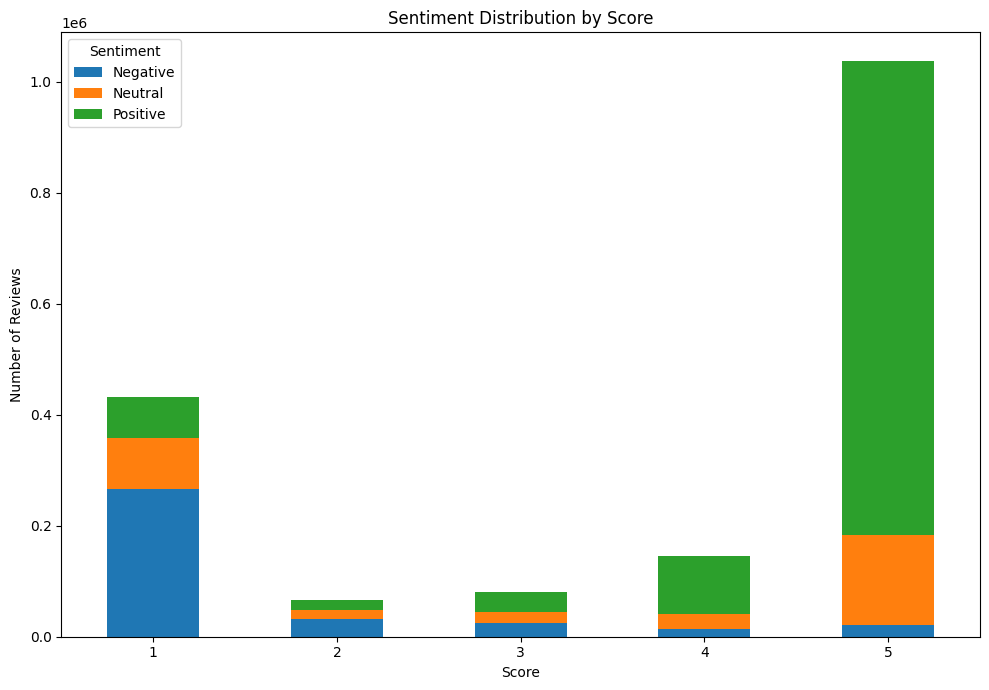

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Score and Sentiment and count occurrences
sentiment_by_score = df.groupby('Score')['Sentiment'].value_counts().unstack().fillna(0)

# Create a stacked bar chart
sentiment_by_score.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution by Score')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

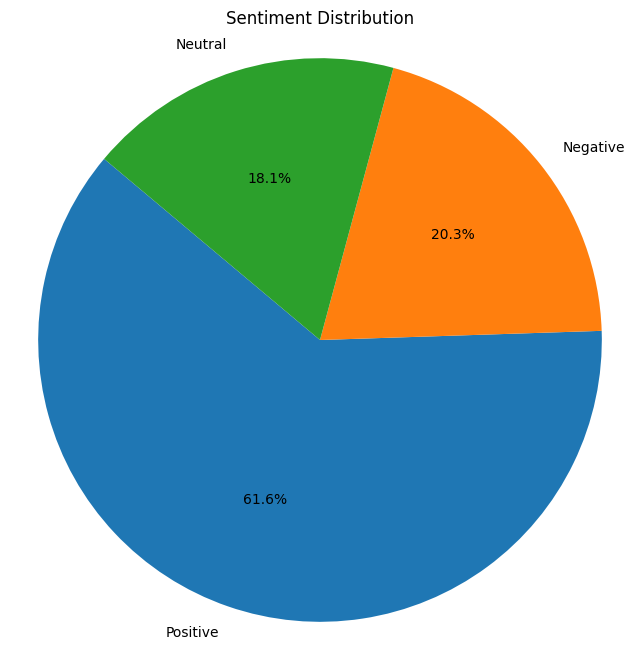

In [8]:


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tally, labels=tally.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

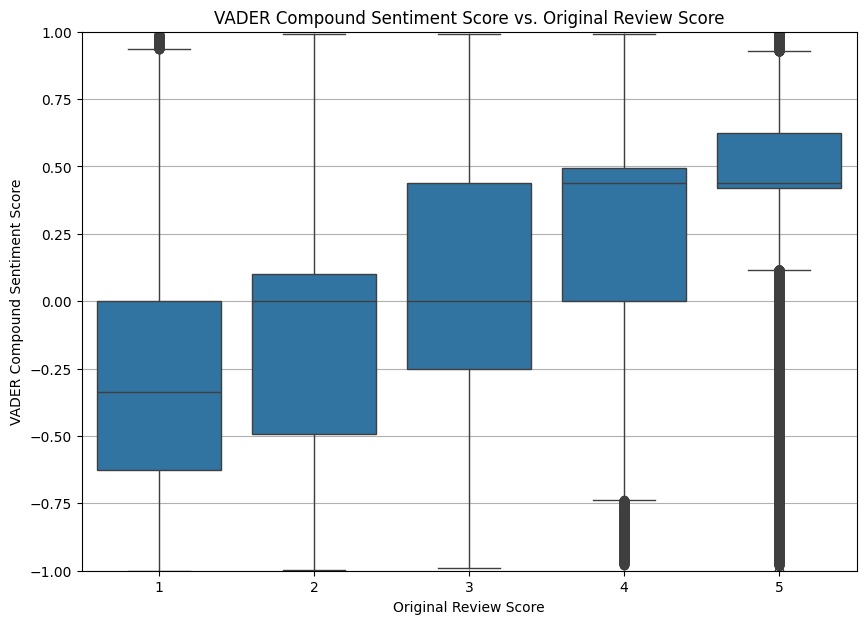

In [9]:
# Calculate the compound sentiment score for each review
df['compound_score'] = df['Review'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Create a scatter plot or a box plot to visualize the relationship
plt.figure(figsize=(10, 7))
sns.boxplot(x='Score', y='compound_score', data=df)
plt.title('VADER Compound Sentiment Score vs. Original Review Score')
plt.xlabel('Original Review Score')
plt.ylabel('VADER Compound Sentiment Score')
plt.ylim(-1, 1) # Compound score ranges from -1 to 1
plt.grid(True)
plt.show()

/tmp/ipython-input-491264330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


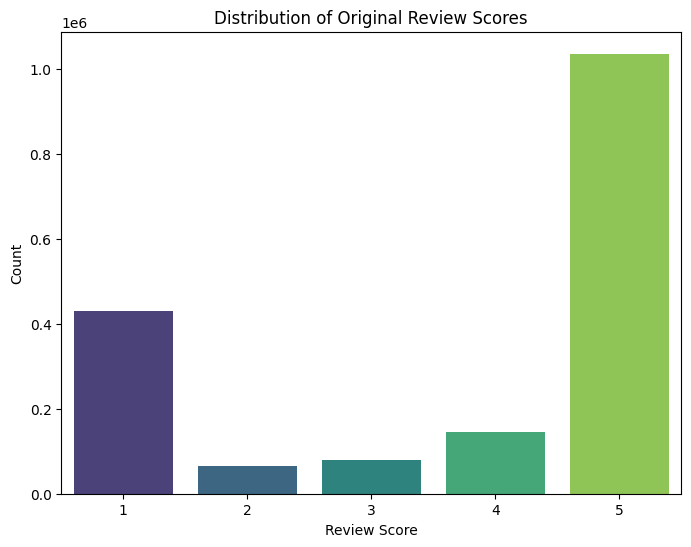

In [10]:


# Visualize the distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Score', palette='viridis')
plt.title('Distribution of Original Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

In [11]:
from collections import Counter
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', '', str(text).lower()) # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
    return text

# Separate reviews by sentiment
positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].apply(clean_text)
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].apply(clean_text)

# Function to get most common words
def get_most_common_words(reviews, num_words=20):
    all_words = ' '.join(reviews).split()
    words = [word for word in all_words if word not in stop_words and len(word) > 2] # Remove stop words and short words
    return Counter(words).most_common(num_words)

# Get most common positive and negative words
common_positive_words = get_most_common_words(positive_reviews)
common_negative_words = get_most_common_words(negative_reviews)

print("Most common words in positive reviews:")
for word, count in common_positive_words:
    print(f"{word}: {count}")

print("\nMost common words in negative reviews:")
for word, count in common_negative_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common words in positive reviews:
good: 368599
app: 147140
uber: 133650
nice: 126861
service: 123302
great: 101192
driver: 81434
ride: 70227
excellent: 62295
best: 54984
drivers: 50514
time: 48920
experience: 39436
use: 38694
love: 36648
easy: 33042
awesome: 32505
like: 31083
get: 26656
friendly: 24382

Most common words in negative reviews:
uber: 144137
app: 129376
driver: 101388
ride: 85395
drivers: 76801
service: 61727
time: 60456
worst: 55262
bad: 48669
cancel: 47649
dont: 40807
trip: 40038
customer: 37213
even: 36609
get: 36378
use: 32010
pay: 29797
charged: 29203
cab: 27881
experience: 27345


Let's find the most common phrases (bigrams and trigrams) in the positive and negative reviews.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def get_most_common_ngrams(reviews, n=2, num_ngrams=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(reviews)
    bag_of_words = vec.transform(reviews)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:num_ngrams]

# Get most common bigrams
common_positive_bigrams = get_most_common_ngrams(positive_reviews, n=2)
common_negative_bigrams = get_most_common_ngrams(negative_reviews, n=2)

# Get most common trigrams
common_positive_trigrams = get_most_common_ngrams(positive_reviews, n=3)
common_negative_trigrams = get_most_common_ngrams(negative_reviews, n=3)

print("Most common bigrams in positive reviews:")
for phrase, count in common_positive_bigrams:
    print(f"{phrase}: {count}")

print("\nMost common bigrams in negative reviews:")
for phrase, count in common_negative_bigrams:
    print(f"{phrase}: {count}")

print("\nMost common trigrams in positive reviews:")
for phrase, count in common_positive_trigrams:
    print(f"{phrase}: {count}")

print("\nMost common trigrams in negative reviews:")
for phrase, count in common_negative_trigrams:
    print(f"{phrase}: {count}")

Most common bigrams in positive reviews:
good service: 38852
good app: 21935
nice app: 14609
easy use: 12574
great service: 12308
good experience: 12004
excellent service: 11278
great app: 11039
best app: 7668
love uber: 7176
great experience: 6287
good driver: 5875
customer service: 5600
nice service: 5589
customer care: 5105
best service: 5067
using uber: 5012
use uber: 4917
uber app: 4614
great driver: 4553

Most common bigrams in negative reviews:
worst app: 16466
customer service: 13618
cancel ride: 11209
bad experience: 8616
worst experience: 7302
worst service: 6752
cancel trip: 6636
uber driver: 5932
use uber: 5906
uber app: 5864
customer care: 5717
bad service: 5528
drivers cancel: 5395
customer support: 5319
driver cancelled: 4816
use app: 4686
book ride: 4640
dont know: 4575
uber drivers: 4445
cancellation fee: 4424

Most common trigrams in positive reviews:
app easy use: 1662
time using uber: 1140
customer care number: 976
good experience uber: 816
easy use app: 750
great c